# <u>Deep Learning Project</u>: Deep Fake Voice Recognition 

#### ANNA KOUTOUGERA(2022202304012) 
#### DESPOINA ANGELIKI MOISIDOU(2022202304016)

## **Introduction**

In recent years, generative Artificial Intelligence (AI) has advanced significantly, leading to the development of state-of-the-art systems capable of real-time voice conversion via a microphone. These sophisticated deep learning models can clone an individual’s speech and use it in online or phone conversations, leveraging consumer-level computing technology. This report examines the implications of such technology, focusing on classification of Real and Fake audio 

### <u>Original Audio Classification Dataset</u>: 

We present an original audio classification dataset, featuring recordings from 8 well-known public figures. This dataset includes both authentic audio collected from the internet and AI-generated speech produced via Retrieval-based Voice Conversion (RVC).

Table 1
| Photo                  | Individual             | Source                       | Length (MM:SS) |
|------------------------|------------------------|------------------------------|----------------|
| <img src="/Users/antzelinamoysidou/Documents/GitHub/DeepFake-Voice-Recognition/celebrity-pictures/Joe_Biden.jpeg" width="50"/>     | Joe Biden              | Victory Speech[2]              | 10:00          |
| <img src="/Users/antzelinamoysidou/Documents/GitHub/DeepFake-Voice-Recognition/celebrity-pictures/Ryan-Gosling.webp" width="50"/>  | Ryan Gosling           | Golden Globes Speech[3]        | 1:33           |
| <img src="/Users/antzelinamoysidou/Documents/GitHub/DeepFake-Voice-Recognition/celebrity-pictures/Elon-Mask.jpeg" width="50"/>     | Elon Musk              | Commencement Speech[4]         | 10:00          |
| <img src="/Users/antzelinamoysidou/Documents/GitHub/DeepFake-Voice-Recognition/celebrity-pictures/Barack_Obama.jpeg" width="50"/>  | Barack Obama           | Victory Speech[5]              | 10:00          |
| <img src="/Users/antzelinamoysidou/Documents/GitHub/DeepFake-Voice-Recognition/celebrity-pictures/Margot-Robbie.jpeg" width="50"/> | Margot Robbie          | BAFTAs Speech[6]               | 1:19           |
| <img src="/Users/antzelinamoysidou/Documents/GitHub/DeepFake-Voice-Recognition/celebrity-pictures/Linus-Sebastian.jpeg" width="50"/>| Linus Sebastian        | Stepping Down Monologue[7]     | 9:30           |
| <img src="/Users/antzelinamoysidou/Documents/GitHub/DeepFake-Voice-Recognition/celebrity-pictures/Talor-Swift.jpeg" width="50"/>  | Taylor Swift           | Women in Music Speech[8]       | 10:00          |
| <img src="/Users/antzelinamoysidou/Documents/GitHub/DeepFake-Voice-Recognition/celebrity-pictures/Donald_Trump.jpeg" width="50"/>  | Donald Trump           | Victory Speech[9]              | 10:00          |
|                        | **Total**              |                              | **62:22**      |


[2] [Victory Speech by Joe Biden:](https://www.youtube.com/watch?v=1AfNYztas2c) Last accessed: 07/23

[3] [Golden Globes Speech by Ryan Gosling:](https://www.youtube.com/watch?v=K8JLyUW_MSw) Last accessed: 07/23 

[4] [Commencement Speech by Elon Musk:](https://www.youtube.com/watch?v=MxZpaJK74Y4) Last accessed: 07/23 

[5] [Victory Speech by Barack Obama:](https://www.youtube.com/watch?v=IeCY-jKpoZ0) Last accessed: 07/23

[6] [BAFTAs Speech by Margot Robbie:](https://www.youtube.com/watch?v=-JA3_QBfjG8)Last accessed: 07/23

[7] [Stepping Down Monologue by Linus Sebastian:](https://www.youtube.com/watch?v=0vuzqunync8) Last accessed: 07/23 

[8] [Women in Music Speech by Taylor Swift:](https://www.youtube.com/watch?v=ZVpkFb9-fts) Last accessed: 07/23 

[9] [Victory Speech by Donald Trump:](https://www.youtube.com/watch?v=Qsvy10D5rtc) Last accessed: 07/23

**Eight** individuals were selected, each serving as a source for real speech data and its conversion into AI-generated speech. Table 1 details the sources of the speech. In total, **62 minutes and 22 seconds of speech** were collected from these eight individuals. Audio tracks were limited to a **maximum of ten minutes each**. The dataset exhibits varying levels of background noise; for instance, some tracks include cheering from supporters during Presidential victory speeches, while others, like Linus Sebastian's Stepping Down Monologue, are of production-level quality. In contrast, Elon Musk’s Commencement Speech was recorded from a distance without studio-quality equipment, resulting in lower quality. These tracks were intentionally chosen to introduce variation within the dataset.

### <u>CSV from Source Dataset after Cleaning </u>:

The following dataset is part of our datasource.It consists of audio features derived from segments of longer audio clips, but the cleanling and transformation processes of the audio are unknown. Upon evaluation, we identified a significant issue: during a random train/test split, segments from the same original audio clip could be divided between the training and test sets. This can cause data leakage, as segments from the same source share inherent characteristics, leading to overly optimistic performance assessments. To prevent this, it is crucial to include an additional column indicating the original audio source for each segment. This would enable grouping segments from the same source together, ensuring they are entirely within either the training or test set, thereby avoiding data leakage.


In [2]:
import pandas as pd
datasource = pd.read_csv('DATASET-balanced.csv')
datasource

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,24.046888,...,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,0.953935,-5.013138,-6.779060,FAKE
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,5.114784,...,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-1.757634,-9.537907,-8.494421,FAKE
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,23.891073,...,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-1.617120,-3.922354,-7.033001,FAKE
3,0.319933,0.031504,2241.665382,3503.766175,3798.641521,0.047180,-404.636749,136.320908,2.308172,-3.907071,...,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-5.407063,-3.654926,-3.274857,FAKE
4,0.420055,0.016158,2526.069123,3102.659519,5025.077899,0.051905,-410.497925,152.731400,-18.266771,51.993462,...,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,2.616843,-1.793357,-5.060998,FAKE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11773,0.435426,0.025303,2772.575031,2728.757601,4998.670213,0.074323,-342.309753,144.490418,-79.272942,8.890874,...,-17.982819,-7.831161,-1.127167,-7.669674,-0.653850,-8.037575,-2.671002,-4.483765,-3.355975,REAL
11774,0.454611,0.070578,1029.274601,1519.231563,1922.927486,0.026553,-332.230408,202.603012,-0.181929,-2.146542,...,-2.018668,-2.705635,-1.589172,-2.938737,-0.972690,-1.706672,-2.796168,2.171270,-1.660128,REAL
11775,0.374432,0.019063,4063.645317,3558.261357,7299.133512,0.110278,-372.149109,92.670235,-29.082432,59.736637,...,-6.628118,-3.827499,-7.287946,-2.899543,-11.508186,-1.296590,-14.325416,-4.405540,-15.869982,REAL
11776,0.410885,0.090499,1124.655596,1553.651133,2065.942806,0.031761,-328.062805,193.557526,6.779151,-1.304731,...,-5.437202,-4.252508,-1.258683,-2.107233,-1.018154,-2.716950,-3.681598,3.811063,3.948419,REAL


For the reason we said before we decide to make our own audio cleaning and transformation and recreate a new csv dataset for further analysis.

### <u>Data Flow</u>: 

### 1.  Exploratory Audio Analysis

As a first step we tried to understand what type of audio we had in order to built a strategy for the next steps.

On that step we will see information about:
- Duration of each audio
- Number of channels
- Sample Rate
- Class Distribution
- FFT Visuals
- Spectrogram
- MFCC Visuals


### 2.  Audio Cleaning

On that step we will make some changes and adjustments to prepare the audio for our new dataset.

The adjustments include:

- Downsampling
- Changing of Sample Rate το 1.600
- Changinh the Number of Channels from Stereo to Mono


### 3.  Preprocessing

In the preprocessing stage of audio data for training a CNN classifier, we typically follow these steps:

- Normalization
- Image Format
- Data Arrangement
- Interpolating MFCC Values


<u>Approach to the Problem</u>

In our analysis, we employed two distinct methods to address the challenge of classifying audio samples:

1. **Audio Splitting into 3-Second Segments**
To improve the accuracy and efficiency of our classification models, we divided the original audio files into 3-second segments. This segmentation process allowed us to increase the number of training samples, thereby providing the models with more data to learn from. By focusing on shorter segments, the models could capture finer details and variations within the audio, enhancing their ability to distinguish between different classes.


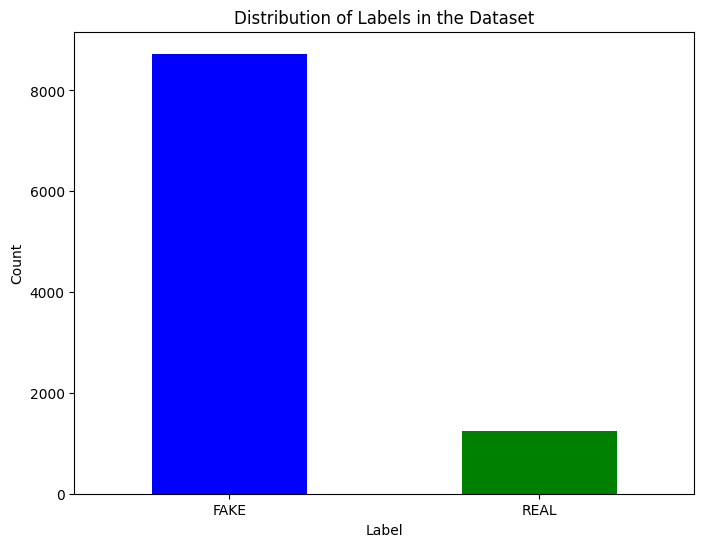

In [5]:
import matplotlib.pyplot as plt
new_dataset = pd.read_csv('classic_dataset.csv')


label_counts=new_dataset['LABEL'].value_counts()

plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of Labels in the Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

2. **Data Augmentation**
To further bolster the dataset and improve model generalization, we applied data augmentation techniques. This involved generating additional training samples by making small modifications to the original audio files. These modifications included pitch shifting, time stretching, and adding background noise. The goal of data augmentation was to simulate a variety of real-world scenarios and conditions, enabling the models to become more robust and less sensitive to overfitting.

In [ ]:
## NA VALW TO IDIO GRAFIMA GIA DATA AUGMNENTATION


<u>Data Extraction Methods</u>

We extracted data using two distinct methods to facilitate our analysis and model training:

1. **Feature Vectors from Audio Segments**
For the first method, we processed the audio files by splitting them into 3-second segments and extracting relevant features. These features, which included chroma_stft, rms, spectral_centroid, spectral_bandwidth, and various MFCCs, were compiled into a CSV file. This file contained the feature vectors for each audio segment, serving as the input for traditional machine learning models such as Random Forest, SVM, KNN, and XGBoost. The feature extraction allowed us to capture the essential characteristics of the audio in a structured format suitable for these models.

A) After extracting feature vectors from audio data we conclude with the following dataset :

In [6]:
new_dataset

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,original_sample,LABEL
0,0.406386,2.330448e-06,1726.655699,1313.557843,2691.572473,0.166597,-1100.7067,24.243960,-4.094224,-11.856074,...,-0.645584,-1.132566,-2.796956,-3.261251,-0.838425,0.040199,-0.060215,-1.380227,biden-to-linus,FAKE
1,0.488610,1.630488e-06,1494.088560,1153.547713,2407.247340,0.133025,-1096.9489,24.468382,-14.611142,-24.319674,...,-4.825761,-5.560062,-2.493378,0.818925,1.947905,2.038474,0.929851,-0.998066,biden-to-linus,FAKE
2,0.362645,3.494181e-06,1782.177518,1487.270741,3031.000665,0.133561,-1091.5085,32.404736,6.421550,0.285010,...,-2.619793,-1.499528,-1.358110,-2.547226,-2.780263,-4.007583,-1.956640,-2.554284,biden-to-linus,FAKE
3,0.504109,1.449966e-06,1674.299640,1243.949639,2822.639628,0.154214,-1096.3325,22.426727,-19.766582,-29.948235,...,-6.615138,-6.136604,-0.366887,2.285073,2.371751,1.384992,0.033304,1.461536,biden-to-linus,FAKE
4,0.350328,2.722042e-06,1806.168628,1466.968719,3179.770612,0.151310,-1098.4689,25.183228,2.385233,-2.528898,...,-4.927695,-4.255420,-3.070653,-1.945070,-1.668662,-3.040927,-2.284341,-1.515240,biden-to-linus,FAKE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,0.316170,1.284757e-06,1682.845217,1652.609098,3072.639628,0.111993,-1114.6527,15.194299,4.524409,3.563511,...,-0.320019,-0.010580,-1.126601,-1.196117,-0.631510,-0.997464,-1.297959,-0.855159,trump-original,REAL
9972,0.390607,7.107834e-07,1616.014539,1708.714104,3233.460771,0.111874,-1121.9220,10.930627,6.196433,2.819153,...,-0.427091,-0.014760,-0.732595,-1.226603,-0.793108,-0.386619,-0.622035,-0.927777,trump-original,REAL
9973,0.365970,1.233685e-06,2452.892084,1866.356939,4280.751330,0.226599,-1118.0184,13.119451,9.031300,4.715108,...,-1.801935,-0.429014,-0.371208,-0.587302,-0.158402,-0.792657,-0.824357,-0.328380,trump-original,REAL
9974,0.341479,1.393258e-06,1980.140163,1735.292494,3500.664894,0.148453,-1112.7692,16.963621,4.313049,2.521054,...,-0.666117,0.704803,-0.250046,-1.549501,-1.564756,-1.418983,-1.488376,-1.166654,trump-original,REAL


B) After extracting feature vectors from Data Augmentation we conclude with the following dataset 

In [ ]:
## NA VALW TO IDIO dataset GIA DATA AUGMNENTATION

As we can see on the new dataset there is column that give us the information of the origin of each segment and we know exactly the stepts have made for cleaning and transforming.

2. **Mel-spectrogram Images for CNN**
The second method involved generating mel-spectrogram images from the audio segments. These images visually represent the frequency distribution of the audio over time, providing a rich and detailed depiction of the audio signal. We saved these mel-spectrogram images as files to be used as input for Convolutional Neural Networks (CNNs). CNNs are particularly well-suited for image data, and by using mel-spectrograms, we aimed to leverage the deep learning capabilities of CNNs to identify intricate patterns and features in the audio data.

### 4.  Modeling